# Predicting Roseler System using Echo State Neural Network

### Importing Required Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ESN
import pandas as pd

### Set seed for random weights generator

In [2]:
def set_seed(seed=None):
    """Making the seed (for random values) variable if None"""

    # Set the seed
    if seed is None:
        import time
        seed = int((time.time()*10**6) % 4294967295)
    try:
        np.random.seed(seed)
    except Exception as e:
        print( "!!! WARNING !!!: Seed was not set correctly.")
        print( "!!! Seed that we tried to use: "+str(seed))
        print( "!!! Error message: "+str(e))
        seed = None
    print( "Seed used for random values:", seed)
    return seed

In [3]:
## Set a particular seed for the random generator (for example seed = 42), or use a "random" one (seed = None)
# NB: reservoir performances should be averaged accross at least 30 random instances (with the same set of parameters)
seed = 42 #None #42

In [4]:
set_seed(seed) #random.seed(seed)

Seed used for random values: 42


42

In [5]:
initLen = 100
trainLen = initLen + 800
testLen = 700

In [6]:
df =  pd.read_excel(r'C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\Input\Roseler Data\Roseler Data.xlsx', index = False)

In [7]:
df.shape

(1649, 4)

# EDA

In [8]:
import os

if not os.path.exists(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler"):
    os.mkdir(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler")

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':
C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


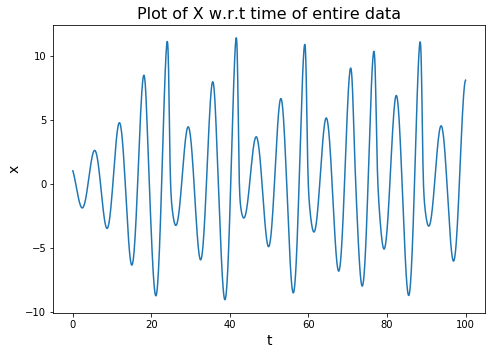

In [9]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['t'],df['x'] )
plt.title('Plot of X w.r.t time of entire data',  fontsize=16)
plt.xlabel('t', fontsize = 14)
plt.ylabel('x', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\X_with_Time.png", bbox_inches = "tight")
plt.show()

import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=df['t'], y=df['x'], mode='markers'))
fig.update_layout(
    title="Plot of X w.r.t time of entire data",
    xaxis_title="Time",
    yaxis_title="X",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


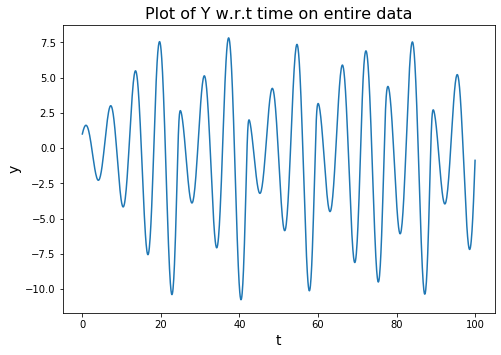

In [10]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['t'],df['y'] )
plt.title('Plot of Y w.r.t time on entire data',  fontsize=16)
plt.xlabel('t', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_with_Time.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


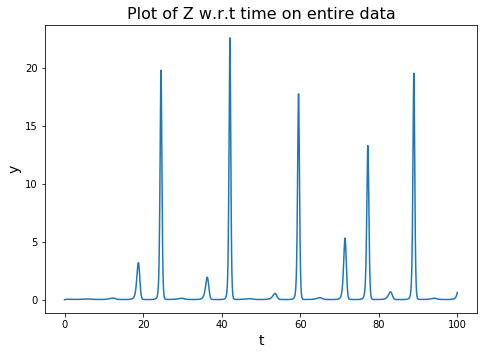

In [11]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['t'],df['z'] )
plt.title('Plot of Z w.r.t time on entire data',  fontsize=16)
plt.xlabel('t', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Z_with_Time.png", bbox_inches = "tight")
plt.show()

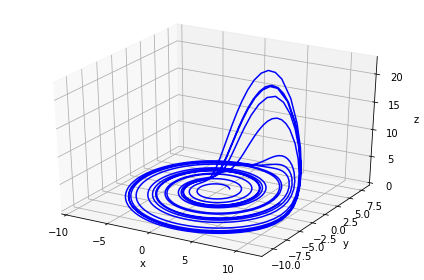

In [12]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot3D(df.x, df.y, df.z, 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\3D_Plot_X_Y_Z_entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


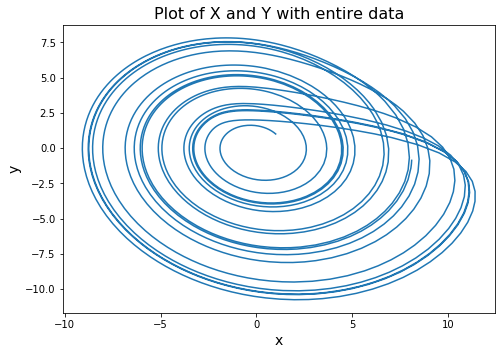

In [13]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['x'],df['y'] )
plt.title('Plot of X and Y with entire data',  fontsize=16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\X_Y_on_Entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


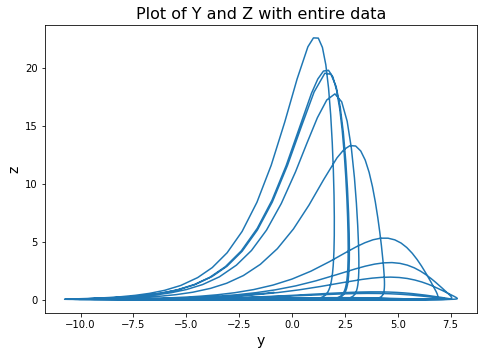

In [14]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['y'],df['z'] )
plt.title('Plot of Y and Z with entire data',  fontsize=16)
plt.xlabel('y', fontsize = 14)
plt.ylabel('z', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_Z_on Entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


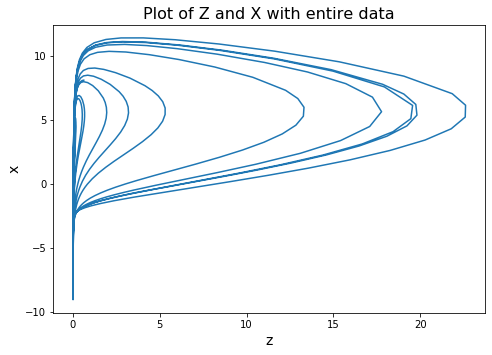

In [15]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df['z'],df['x'] )
plt.title('Plot of Z and X with entire data',  fontsize=16)
plt.xlabel('z', fontsize = 14)
plt.ylabel('x', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Z_X_on Entire_data.png", bbox_inches = "tight")
plt.show()

### Split data for training and testing and creating teaches to train ESN on Input data

In [16]:
data_in = df[['x','y','z']]
data_T  =df['t']

In [17]:
data_in = np.array(data_in)
data_t = np.array(data_T)

In [18]:
train_in = np.array(data_in[0:trainLen])
train_out = np.array(data_in[0+10:trainLen+10])
test_in = np.array(data_in[trainLen:trainLen+testLen])
test_out = np.array(data_in[trainLen+10:trainLen+testLen+10])

In [19]:
train_in_t = np.array(data_T[0:trainLen])
train_out_t = np.array(data_T[0+10:trainLen])
test_in_t = np.array(data_T[trainLen:trainLen+testLen])
test_out_t = np.array(data_T[trainLen+10:trainLen+testLen+10])

In [20]:
len(test_in_t)

700

### <span style="color:blue">Modify Parameters to tune ESN for better fit</span> 

In [21]:
n_reservoir = 400 # number of recurrent units
leak_rate = 0.2 # leaking rate (=1/time_constant_of_neurons)
spectral_radius = 1.1 # Scaling of recurrent matrix
input_scaling = 1. # Scaling of input matrix
proba_non_zero_connec_W = 0.2 # Sparsity of recurrent matrix: Perceptage of non-zero connections in W matrix
proba_non_zero_connec_Win = 1. # Sparsity of input matrix
proba_non_zero_connec_Wfb = 1. # Sparsity of feedback matrix
regularization_coef =   0.1 #None # regularization coefficient, if None, pseudo-inverse is use instead of ridge regression

In [22]:
n_inputs = 3
input_bias = True # add a constant input to 1
n_outputs = 3

In [23]:
N = n_reservoir#100
dim_inp = n_inputs #26

### Generating weights for input and hidden layers 

In [24]:
### Generating random weight matrices with custom method
W = np.random.rand(N,N) - 0.5
if input_bias:
    Win = np.random.rand(N,dim_inp+1) - 0.5
else:
    Win = np.random.rand(N,dim_inp) - 0.5
Wfb = np.random.rand(N,n_outputs) - 0.5

In [25]:
## delete the fraction of connections given the sparsity (i.e. proba of non-zero connections):
mask = np.random.rand(N,N) # create a mask Uniform[0;1]
W[mask > proba_non_zero_connec_W] = 0 # set to zero some connections given by the mask
mask = np.random.rand(N,Win.shape[1])
Win[mask > proba_non_zero_connec_Win] = 0
# mask = np.random.rand(N,Wfb.shape[1])
# Wfb[mask > proba_non_zero_connec_Wfb] = 0

In [26]:
## SCALING of matrices
# scaling of input matrix
Win = Win * input_scaling
# scaling of recurrent matrix
# compute the spectral radius of these weights:
print( 'Computing spectral radius...')
original_spectral_radius = np.max(np.abs(np.linalg.eigvals(W)))
#TODO: check if this operation is quicker: max(abs(linalg.eig(W)[0])) #from scipy import linalg
print( "default spectral radius before scaling:", original_spectral_radius)
# rescale them to reach the requested spectral radius:
W = W * (spectral_radius / original_spectral_radius)
print( "spectral radius after scaling", np.max(np.abs(np.linalg.eigvals(W))))


Computing spectral radius...
default spectral radius before scaling: 2.6206385401678642
spectral radius after scaling 1.0999999999999956


## <span style="color:Green">Input data dimensions</span>

In [27]:
print('Dimensions of Training data: ', train_in.shape[1])
print('Dimensions of Testing data: ', test_in.shape[1])

Dimensions of Training data:  3
Dimensions of Testing data:  3


### <span style="color:blue">Pass Parameters to ESN</span>

In [28]:
reservoir = ESN.ESN(lr=leak_rate, W=W, Win=Win, input_bias=input_bias, ridge=regularization_coef, Wfb=None, fbfunc=None)

## Input data to reservoir model

In [29]:
internal_trained = reservoir.train(inputs=[train_in], teachers=[train_out], wash_nr_time_step=initLen, verbose=False)
output_pred, internal_pred = reservoir.run(inputs=[test_in,], reset_state=False)
errorLen = len(test_out[:]) #testLen #2000

## Dimensions of the output data

In [30]:
print('Shape of Output data Dimensions: ', output_pred[0].shape[1])

Shape of Output data Dimensions:  3


### Create dataframe for predicted values and test values

In [31]:
import pandas as pd
df_pred = pd.DataFrame(output_pred[0])

In [32]:
output_pred[0].shape

(700, 3)

In [33]:
test_out = pd.DataFrame(test_out)

### <span style="color:blue">MSE for X</span>

In [34]:
## printing errors made on test set
# mse = sum( np.square( test_out[:] - output_pred[0] ) ) / errorLen
# print( 'MSE = ' + str( mse ))
mse_x = np.mean((test_out[0][:] - df_pred[0])**2) # Mean Squared Error: see https://en.wikipedia.org/wiki/Mean_squared_error
rmse_x = np.sqrt(mse_x) # Root Mean Squared Error: see https://en.wikipedia.org/wiki/Root-mean-square_deviation for more info
nmrse_mean_x = abs(rmse_x / np.mean(test_out[0][:])) # Normalised RMSE (based on mean)
nmrse_maxmin_x = rmse_x / abs(np.max(test_out[0][:]) - np.min(test_out[0][:])) # Normalised RMSE (based on max - min)

In [35]:
print("\n**********  MSE and RMSE for Predictions on X  **********")
print("Errors computed over %d time steps" % (errorLen))
print("\nMean Squared error (MSE) for x : \t\t%.4e " % (mse_x) )
print("Root Mean Squared error (RMSE) for x : \t\t%.4e\n " % rmse_x )
print("Normalized RMSE (based on mean) for x : \t%.4e " % (nmrse_mean_x) )
print("Normalized RMSE (based on max - min) for x : \t%.4e " % (nmrse_maxmin_x) )
print("*********************************************************\n")


**********  MSE and RMSE for Predictions on X  **********
Errors computed over 700 time steps

Mean Squared error (MSE) for x : 		8.9935e-02 
Root Mean Squared error (RMSE) for x : 		2.9989e-01
 
Normalized RMSE (based on mean) for x : 	3.2858e-01 
Normalized RMSE (based on max - min) for x : 	1.5126e-02 
*********************************************************



### <span style="color:blue">MSE for Y</span>

In [36]:
## printing errors made on test set
# mse = sum( np.square( test_out[:] - output_pred[0] ) ) / errorLen
# print( 'MSE = ' + str( mse ))
mse_y = np.mean((test_out[1][:] - df_pred[1])**2) # Mean Squared Error: see https://en.wikipedia.org/wiki/Mean_squared_error
rmse_y = np.sqrt(mse_x) # Root Mean Squared Error: see https://en.wikipedia.org/wiki/Root-mean-square_deviation for more info
nmrse_mean_y = abs(rmse_y / np.mean(test_out[1][:])) # Normalised RMSE (based on mean)
nmrse_maxmin_y = rmse_y / abs(np.max(test_out[1][:]) - np.min(test_out[1][:])) # Normalised RMSE (based on max - min)

In [37]:
print("\n**********  MSE and RMSE for Predictions on Y  **********")
print("Errors computed over %d time steps" % (errorLen))
print("\nMean Squared error (MSE) for Y : \t\t%.4e " % (mse_y) )
print("Root Mean Squared error (RMSE) for Y : \t\t%.4e\n " % rmse_y )
print("Normalized RMSE (based on mean) for Y : \t%.4e " % (nmrse_mean_y) )
print("Normalized RMSE (based on max - min) for Y : \t%.4e " % (nmrse_maxmin_y) )
print("*********************************************************\n")


**********  MSE and RMSE for Predictions on Y  **********
Errors computed over 700 time steps

Mean Squared error (MSE) for Y : 		3.3645e-02 
Root Mean Squared error (RMSE) for Y : 		2.9989e-01
 
Normalized RMSE (based on mean) for Y : 	1.3777e+00 
Normalized RMSE (based on max - min) for Y : 	1.6762e-02 
*********************************************************



### <span style="color:blue">MSE for Z</span>

In [38]:

## printing errors made on test set
# mse = sum( np.square( test_out[:] - output_pred[0] ) ) / errorLen
# print( 'MSE = ' + str( mse ))
mse_y = np.mean((test_out[2][:] - df_pred[1])**2) # Mean Squared Error: see https://en.wikipedia.org/wiki/Mean_squared_error
rmse_y = np.sqrt(mse_x) # Root Mean Squared Error: see https://en.wikipedia.org/wiki/Root-mean-square_deviation for more info
nmrse_mean_y = abs(rmse_y / np.mean(test_out[2][:])) # Normalised RMSE (based on mean)
nmrse_maxmin_y = rmse_y / abs(np.max(test_out[2][:]) - np.min(test_out[2][:])) # Normalised RMSE (based on max - min)

In [39]:
print("\n**********  MSE and RMSE for Predictions on Z  **********")
print("Errors computed over %d time steps" % (errorLen))
print("\nMean Squared error (MSE) for Z : \t\t%.4e " % (mse_y) )
print("Root Mean Squared error (RMSE) for Z : \t\t%.4e\n " % rmse_y )
print("Normalized RMSE (based on mean) for Z : \t%.4e " % (nmrse_mean_y) )
print("Normalized RMSE (based on max - min) for Z : \t%.4e " % (nmrse_maxmin_y) )
print("*********************************************************\n")


**********  MSE and RMSE for Predictions on Z  **********
Errors computed over 700 time steps

Mean Squared error (MSE) for Z : 		2.9563e+01 
Root Mean Squared error (RMSE) for Z : 		2.9989e-01
 
Normalized RMSE (based on mean) for Z : 	3.0044e-01 
Normalized RMSE (based on max - min) for Z : 	1.5347e-02 
*********************************************************



# 3D Plot with predicted and actural values

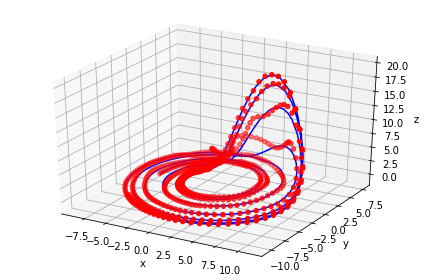

In [40]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(test_out[0], test_out[1], test_out[2], 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(df_pred[0], df_pred[1], df_pred[2], c='r')
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\3D_Plot_X_Y_Z_entire_data.png", bbox_inches = "tight")
plt.show()

In [41]:
len(df_pred[0])

700

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


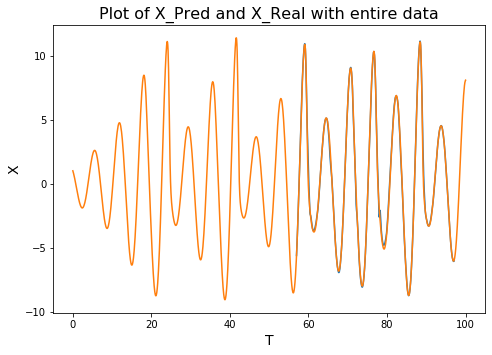

In [42]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[0])
plt.title('Plot of X_Pred and X_Real with entire data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('X', fontsize = 14)
ax.plot(df['t'],df['x'])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\X_Pred_X_Real_on Entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


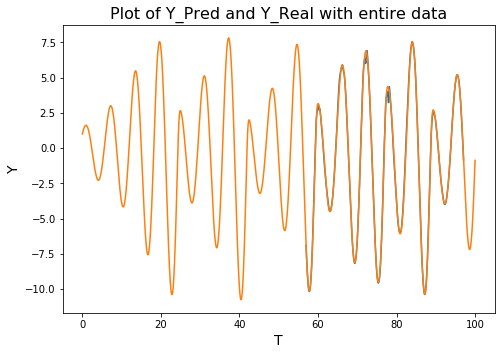

In [43]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[1])
plt.title('Plot of Y_Pred and Y_Real with entire data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('Y', fontsize = 14)
ax.plot(df['t'],df['y'])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_Pred_Y_Real_on Entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


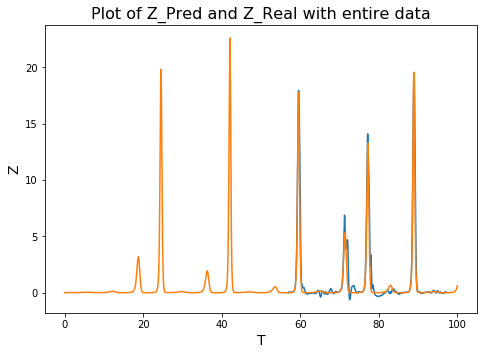

In [44]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[2])
plt.title('Plot of Z_Pred and Z_Real with entire data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('Z', fontsize = 14)
ax.plot(df['t'],df['z'])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Z_Pred_Z_Real_on Entire_data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


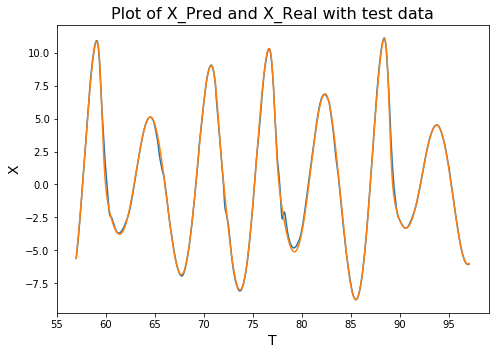

In [45]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[0])
plt.title('Plot of X_Pred and X_Real with test data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('X', fontsize = 14)
ax.plot(test_out_t,test_out[0])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\X_pred_vs_X_Real_with_time_on_Test_Data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


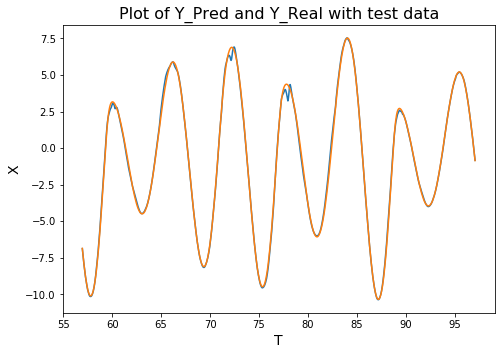

In [46]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[1])
plt.title('Plot of Y_Pred and Y_Real with test data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('X', fontsize = 14)
ax.plot(test_out_t,test_out[1])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_pred_vs_Y_Real_with_time_on_Test_Data.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


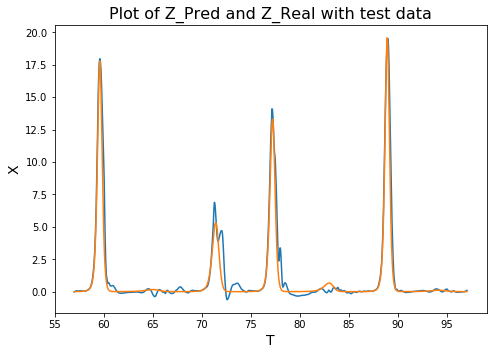

In [47]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_pred[2])
plt.title('Plot of Z_Pred and Z_Real with test data',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('X', fontsize = 14)
ax.plot(test_out_t,test_out[2])
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Z_pred_vs_Z_Real_with_time_on_Test_Data.png", bbox_inches = "tight")
plt.show()

# Plotting Local Error from predicted and actual values

In [48]:
df_local_error = pd.DataFrame()

In [49]:
df_local_error['X_Local_Error'] = test_out[0] - df_pred[0]
df_local_error['Y_Local_Error'] = test_out[1] - df_pred[1]
df_local_error['Z_Local_Error'] = test_out[2] - df_pred[2]

In [50]:
df_local_error.describe()

,X_Local_Error,Y_Local_Error,Z_Local_Error
count,700.000000,700.000000,700.000000
mean,-0.058042,0.023551,-0.319826
std,0.294431,0.182038,0.898724
min,-1.461199,-0.609048,-5.363095
25%,-0.109939,-0.046879,-0.325064
50%,-0.015497,0.016382,-0.033417
75%,0.064458,0.071963,0.055664
max,0.845738,1.085623,0.689659


C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


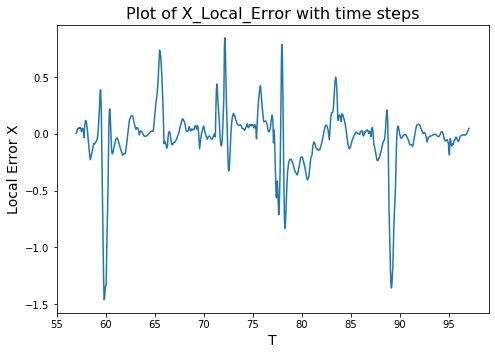

In [51]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_local_error['X_Local_Error'] )
plt.title('Plot of X_Local_Error with time steps',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('Local Error X', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_Z_on Local_Error_X.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


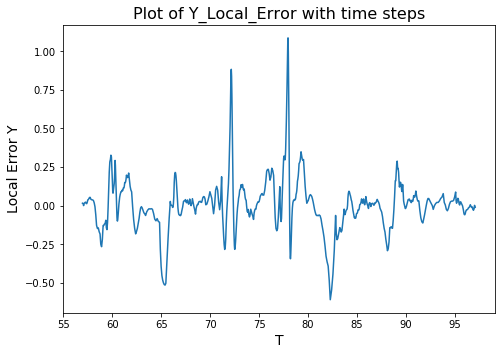

In [52]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_local_error['Y_Local_Error'] )
plt.title('Plot of Y_Local_Error with time steps',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('Local Error Y', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_Z_on Local_Error_Y.png", bbox_inches = "tight")
plt.show()

C:\Users\INFO-DSK-02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


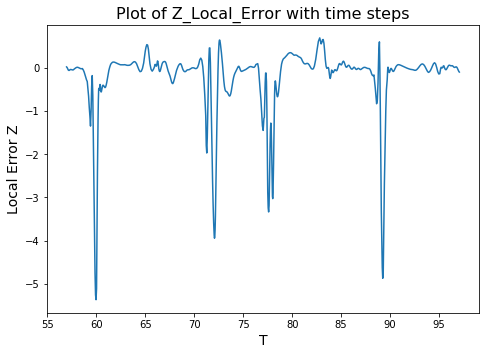

In [53]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(test_out_t,df_local_error['Z_Local_Error'] )
plt.title('Plot of Z_Local_Error with time steps',  fontsize=16)
plt.xlabel('T', fontsize = 14)
plt.ylabel('Local Error Z', fontsize = 14)
plt.savefig(r"C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\images\Roseler\Y_Z_on Local_Error_Z.png", bbox_inches = "tight")
plt.show()

In [54]:
df_pred.columns= ['X_pred', 'Y_pred', 'Z_pred']

In [55]:
df_pred.head()

,X_pred,Y_pred,Z_pred
0,-5.614088,-6.887247,-0.001867
1,-5.212370,-7.284159,0.014969
2,-4.807194,-7.647914,0.044172
3,-4.398919,-7.980135,0.070426
4,-3.985817,-8.284720,0.081080


In [56]:
test_out.columns = ['X_test', 'Y_test', 'Z_test']

In [57]:
df_out = pd.concat([df_pred, test_out], axis = 1)

In [58]:
df_out['Test_T'] = test_out_t

In [59]:
df_out.to_excel(r'C:\Users\INFO-DSK-02\Desktop\Lorentz Multi Dimension Prediction-Phase-2\Final_Version\3D_ReservoirComputing\Output\Reseler_Preds\Roseler_Output.xlsx', index= False)